In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Select companies by sector

In [2]:

listings = pd.read_csv('data/stock_data/components.csv')

In [3]:
listings

,Stock Symbol,Market Capitalization,Last Sale,Number of Shares
0,RIO,70431.476895,38.94,1808.717948
1,ILMN,25409.384000,173.68,146.300000
2,CPRT,13620.922869,29.65,459.390316
3,EL,31122.510011,84.94,366.405816
4,AMZN,422138.530626,884.67,477.170618
5,PAA,22223.001416,30.72,723.404994
6,GS,88840.590477,223.32,397.817439
7,AMGN,118927.210535,161.61,735.890171
8,MA,123330.089602,111.22,1108.884100
9,TEF,54609.806092,10.84,5037.804990


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           12 non-null     object 
 1   Market Capitalization  12 non-null     float64
 2   Last Sale              12 non-null     float64
 3   Number of Shares       12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [5]:

# The index is currently a RangeIndex
# Make the Stock Symbol column the index
listings.set_index('Stock Symbol', inplace=True)
listings.head()

,Market Capitalization,Last Sale,Number of Shares
Stock Symbol,,,
RIO,70431.476895,38.94,1808.717948
ILMN,25409.384000,173.68,146.300000
CPRT,13620.922869,29.65,459.390316
EL,31122.510011,84.94,366.405816
AMZN,422138.530626,884.67,477.170618


In [6]:
tickers = listings.index
print(tickers)

Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [7]:

# We'll need current prices to calculate returns for the companies in our index
stock_prices = pd.read_csv('data/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.head())

             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30   
2010-01-06  30.14  56.79  132.25  4.53  24.25  174.26  32.22  25.56  27.29   
2010-01-07  30.08  56.27  130.00  4.50  24.56  177.67  32.77  25.39  26.96   
2010-01-08  30.28  56.77  133.52  4.52  24.66  174.31  33.15  25.40  27.05   

              RIO    TEF    UPS  
Date                             
2010-01-04  56.03  28.55  58.18  
2010-01-05  56.90  28.53  58.28  
2010-01-06  58.64  28.23  57.85  
2010-01-07  58.65  27.75  57.41  
2010-01-08  59.30  27.57  60.17  


In [8]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


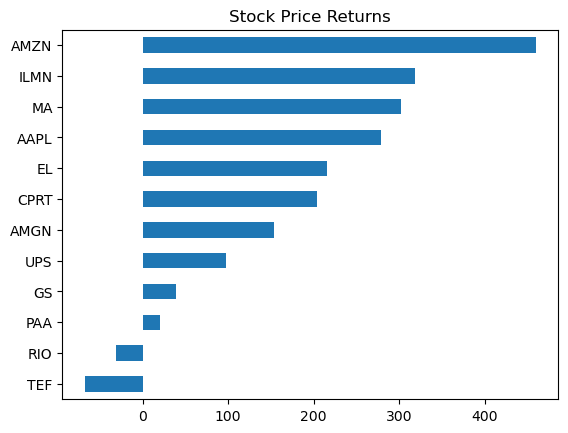

In [9]:

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

## Compute sector company returns

In [10]:

# Calculate the number of shares
index_companies = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
num_shares = index_companies['Market Capitalization'].div(index_companies['Last Sale'])
print(num_shares.sort_values(ascending=False))

Stock Symbol
AAPL    5246.540000
TEF     5037.804990
RIO     1808.717948
MA      1108.884100
UPS      869.297154
AMGN     735.890171
PAA      723.404994
AMZN     477.170618
CPRT     459.390316
GS       397.817439
EL       366.405816
ILMN     146.300000
dtype: float64


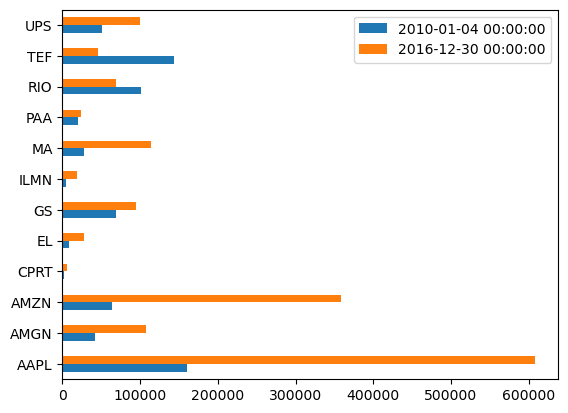

In [11]:

# Create the series of market cap per ticker
market_cap = stock_prices.mul(num_shares)

# Select first and last market cap
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

## Create sector market cap-weighted index

In [12]:

# Aggregate market cap by trading day
raw_index = market_cap.sum(axis=1)

# Normalize the aggregated market cap
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64


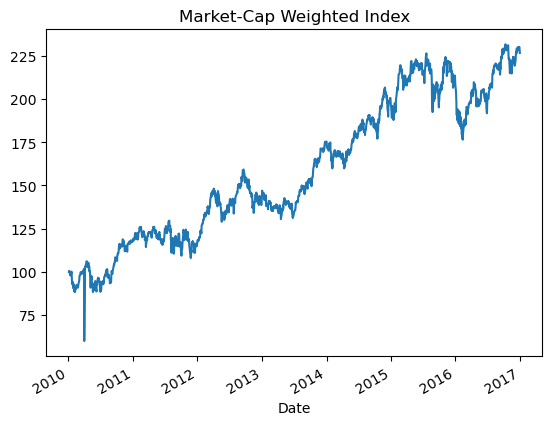

In [13]:

# Plot the index
index.plot(title='Market-Cap Weighted Index')
plt.show()

## Calculate the contibution of each stock to the index

In [14]:


index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100

market_cap = index_companies['Market Capitalization']
total_market_cap = market_cap.sum()

weights = market_cap.div(total_market_cap)
print(weights.sort_values())

Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410929
Name: Market Capitalization, dtype: float64


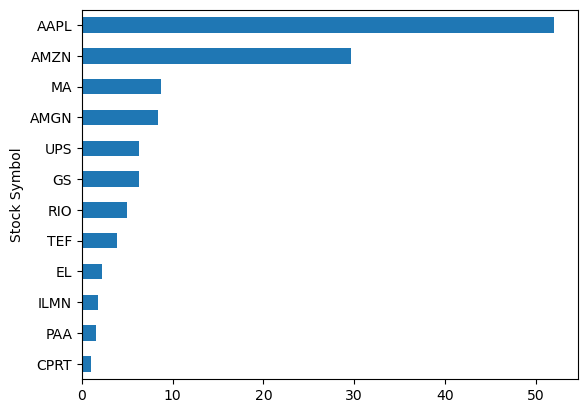

In [15]:

# Plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

## Compare index performance to benchmark

In [16]:

idx_data = index.to_frame('Index') # Convert index series to dataframe

# Load normalised benchmark data
djia = pd.read_csv('data/stock_data/djia2.csv', parse_dates=['DATE'], index_col='DATE')
djia.head()

,DJIA
DATE,
2010-01-04,100.000000
2010-01-05,99.887188
2010-01-06,99.902872
2010-01-07,100.216365
2010-01-08,100.323414


Index    126.658267
DJIA      86.722172
dtype: float64


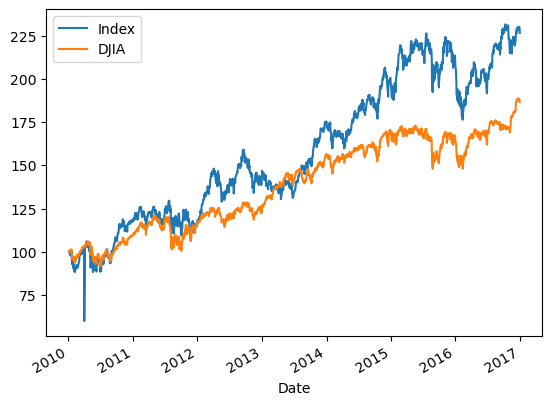

In [17]:

# add normalised benchmark column to index data
idx_data['DJIA'] = djia

# Show total return for both index and djia
print(idx_data.iloc[-1].div(idx_data.iloc[0]).sub(1).mul(100))

# Plot both series
idx_data.plot()
plt.show()

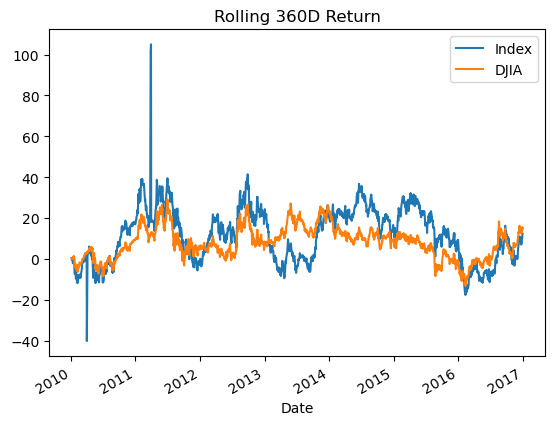

In [18]:

# Compare the index and DJIA on a rolling 360-day basis and determine when it would have been profitable to switch
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

rolling_return_360 = idx_data.pct_change().rolling('360D').apply(multi_period_return)

rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

## Visualise index constituent correlations and export to Excel

In [19]:
sector_stocks = [i for i in tickers if i in stock_prices.columns]
returns = stock_prices.loc[:,sector_stocks].pct_change()
correlations = returns.corr()
print(correlations)

           RIO      ILMN      CPRT        EL      AMZN       PAA        GS  \
RIO   1.000000  0.234445  0.384944  0.415416  0.326229  0.337448  0.527298   
ILMN  0.234445  1.000000  0.265665  0.214027  0.242726  0.162796  0.266063   
CPRT  0.384944  0.265665  1.000000  0.371763  0.298929  0.221273  0.423160   
EL    0.415416  0.214027  0.371763  1.000000  0.334031  0.206056  0.358318   
AMZN  0.326229  0.242726  0.298929  0.334031  1.000000  0.182438  0.333402   
PAA   0.337448  0.162796  0.221273  0.206056  0.182438  1.000000  0.271982   
GS    0.527298  0.266063  0.423160  0.358318  0.333402  0.271982  1.000000   
AMGN  0.313878  0.336927  0.355892  0.349893  0.323408  0.229255  0.390076   
MA    0.437778  0.301392  0.401352  0.431556  0.428330  0.243761  0.466796   
TEF   0.559264  0.231173  0.376767  0.428925  0.331867  0.253598  0.498230   
AAPL  0.361684  0.264791  0.346616  0.306770  0.327611  0.212960  0.344981   
UPS   0.509809  0.267801  0.462716  0.456952  0.378399  0.217523

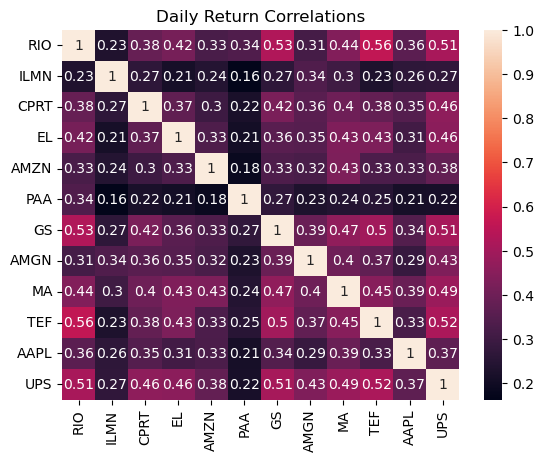

In [20]:

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

In [21]:
stock_idx_data = stock_prices.loc[:,sector_stocks].join(index.to_frame('Index'))
print(stock_idx_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RIO     1762 non-null   float64
 1   ILMN    1761 non-null   float64
 2   CPRT    1761 non-null   float64
 3   EL      1762 non-null   float64
 4   AMZN    1761 non-null   float64
 5   PAA     1762 non-null   float64
 6   GS      1762 non-null   float64
 7   AMGN    1761 non-null   float64
 8   MA      1762 non-null   float64
 9   TEF     1762 non-null   float64
 10  AAPL    1761 non-null   float64
 11  UPS     1762 non-null   float64
 12  Index   1762 non-null   float64
dtypes: float64(13)
memory usage: 192.7 KB
None


In [22]:
returns = stock_idx_data.pct_change()
stock_idx_data.index = stock_idx_data.index.date # keep only the date component of DateTimeIndex
# Export data and returns to excel (same workbook, different worksheets)
with pd.ExcelWriter('data/exported_stock_data.xlsx') as writer:
    stock_idx_data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')